In [1]:
#1. Import dataset
import pandas as pd
train_set_clean_transform= pd.read_csv("train_set_clean_transform.csv")
test_set_clean_transform= pd.read_csv("test_set_clean_transform.csv")

In [2]:
# 4. Check data types of variables
print("\nData types of each column(Train):")
print(train_set_clean_transform.dtypes)
print("\nData types of each column(Test):")
print(test_set_clean_transform.dtypes)


Data types of each column(Train):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object

Data types of each column(Test):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object


In [3]:
#6. Identify object type columns
object_cols = train_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
train_set_clean_transform[object_cols] = train_set_clean_transform[object_cols].astype('category')
# Verify the conversion
#print("Data types after conversion:")
#print(train_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
#print("\nMemory usage before conversion:", train_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(train_set_clean_transform.dtypes)


#6. Identify object type columns
object_cols = test_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
test_set_clean_transform[object_cols] = test_set_clean_transform[object_cols].astype('category')
# Verify the conversion
#print("Data types after conversion:")
#print(test_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
#print("\nMemory usage before conversion:", test_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(test_set_clean_transform.dtypes)


Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object
Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object


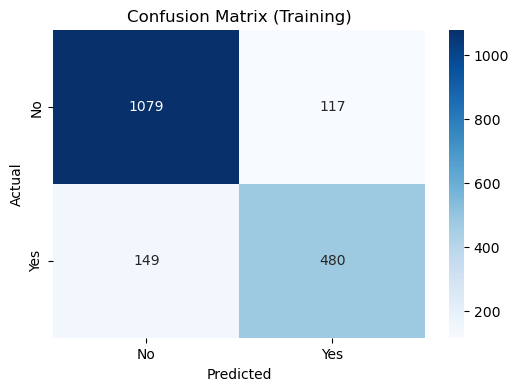


Classification Report (Training):
                      precision    recall  f1-score   support

No MetabolicSyndrome       0.88      0.90      0.89      1196
   MetabolicSyndrome       0.80      0.76      0.78       629

            accuracy                           0.85      1825
           macro avg       0.84      0.83      0.84      1825
        weighted avg       0.85      0.85      0.85      1825



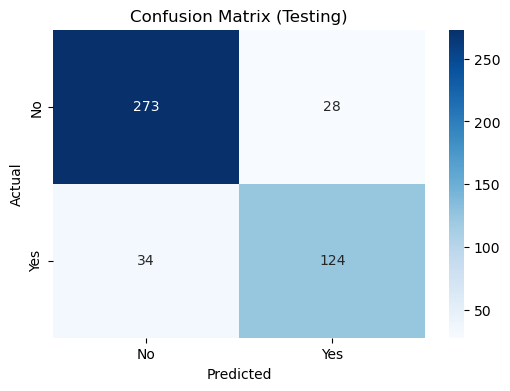


Classification Report (Testing):
                      precision    recall  f1-score   support

No MetabolicSyndrome       0.89      0.91      0.90       301
   MetabolicSyndrome       0.82      0.78      0.80       158

            accuracy                           0.86       459
           macro avg       0.85      0.85      0.85       459
        weighted avg       0.86      0.86      0.86       459


Training Metrics:
                         Value
Accuracy              0.854247
Sensitivity (Recall)  0.763116
Specificity           0.902174
F1 Score              0.783034
AUC-ROC               0.928891

Testing Metrics:
                         Value
Accuracy              0.864924
Sensitivity (Recall)  0.784810
Specificity           0.906977
F1 Score              0.800000
AUC-ROC               0.918689

Top Discriminative Features:
            Feature  LD1_Coefficient
7   QT_BloodGlucose         1.109911
1               Sex        -1.105653
9  QT_Triglycerides         0.953653
4   

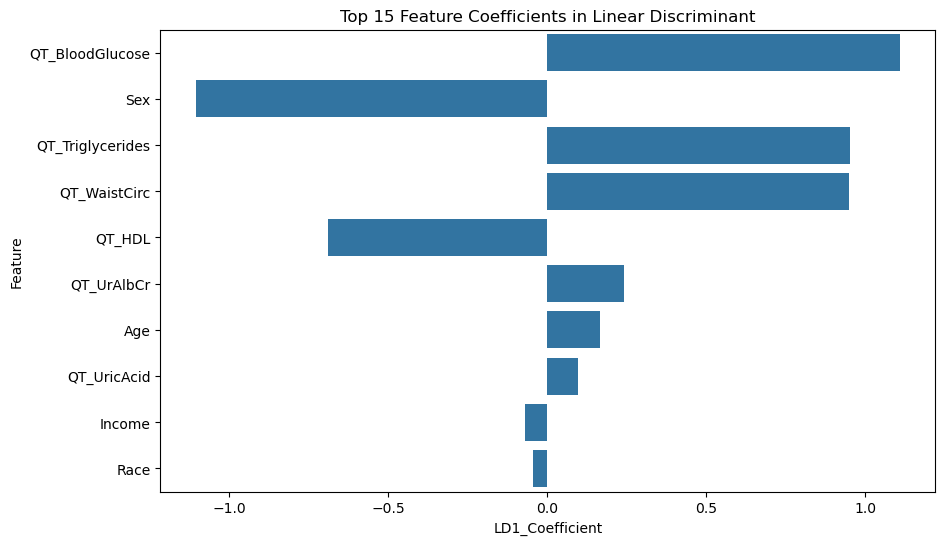

'\nQ1: Does LDA require standardization and one-hot encoding?\n- Standardization: Highly recommended (LDA assumes features are on similar scales)\n- One-hot encoding: Not required (label encoding is sufficient)\n\nKey Advantages of This Implementation:\n1. Proper standardization for optimal LDA performance\n2. Efficient label encoding for categorical variables\n3. Complete evaluation metrics (Accuracy, Sensitivity, Specificity, F1, AUC)\n4. Clear visualization of discriminative features\n5. Interpretation of linear discriminants\n'

In [7]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report)
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# 1. DATA PREPARATION
# =============================================

# Separate features and target (assuming seqn is index)
X_train = train_set_clean_transform.drop(['MetabolicSyndrome', 'seqn','Albuminuria','Marital','QT_BMI'], axis=1)
y_train = train_set_clean_transform['MetabolicSyndrome'].cat.codes  # Convert to 0/1

X_test = test_set_clean_transform.drop(['MetabolicSyndrome', 'seqn','Albuminuria','Marital','QT_BMI'], axis=1)
y_test = test_set_clean_transform['MetabolicSyndrome'].cat.codes

# =============================================
# 2. PREPROCESSING
# =============================================

# Answer to Q1:
# - Standardization: Recommended for LDA (improves performance)
# - One-hot encoding: Not required (use label encoding instead)

# Label encode categorical variables
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Standardize numerical features (important for LDA)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# =============================================
# 3. LINEAR DISCRIMINANT ANALYSIS MODEL
# =============================================

# Initialize and train LDA
lda_model = LinearDiscriminantAnalysis(
    solver='svd',   # Singular Value Decomposition (most accurate)
    store_covariance=True  # For later analysis
)
lda_model.fit(X_train, y_train)

# =============================================
# 4. EVALUATION METRICS
# =============================================

def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Sensitivity (Recall)': recall_score(y, y_pred),
        'Specificity': recall_score(y, y_pred, pos_label=0),
        'F1 Score': f1_score(y, y_pred),
        'AUC-ROC': roc_auc_score(y, y_proba)
    }
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y, y_pred, target_names=['No MetabolicSyndrome', 'MetabolicSyndrome']))
    
    return metrics

# Evaluate on both sets
train_metrics = evaluate_model(lda_model, X_train, y_train, 'Training')
test_metrics = evaluate_model(lda_model, X_test, y_test, 'Testing')

# Display results
print("\nTraining Metrics:")
print(pd.DataFrame.from_dict(train_metrics, orient='index', columns=['Value']))

print("\nTesting Metrics:")
print(pd.DataFrame.from_dict(test_metrics, orient='index', columns=['Value']))

# =============================================
# 5. MODEL ANALYSIS
# =============================================

# Feature coefficients (linear discriminant coefficients)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'LD1_Coefficient': lda_model.coef_[0]  # Coefficients for the first discriminant
}).sort_values('LD1_Coefficient', key=abs, ascending=False)

print("\nTop Discriminative Features:")
print(coef_df.head(10))

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='LD1_Coefficient', y='Feature', data=coef_df.head(15))
plt.title('Top 15 Feature Coefficients in Linear Discriminant')
plt.show()

# =============================================
# ANSWERS TO YOUR QUESTIONS
# =============================================

"""
Q1: Does LDA require standardization and one-hot encoding?
- Standardization: Highly recommended (LDA assumes features are on similar scales)
- One-hot encoding: Not required (label encoding is sufficient)

Key Advantages of This Implementation:
1. Proper standardization for optimal LDA performance
2. Efficient label encoding for categorical variables
3. Complete evaluation metrics (Accuracy, Sensitivity, Specificity, F1, AUC)
4. Clear visualization of discriminative features
5. Interpretation of linear discriminants
"""